**DECISION TREE**

In [13]:
#importing ml libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
pd.options.display.max_columns = 50 
sns.set(style = 'darkgrid', rc = {'axes.facecolor': '#616E7C'})
#rc is row column

In [15]:
#dataset
df = pd.read_csv("heart_disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
#show number of people with heart disease
#targetcolumn is the one for heart disease

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [17]:
#show percentage of males and females
count_female = len(df[df.sex ==0])
count_male = len(df[df.sex ==1])

print('percentage of female: {:.2f}%'.format(count_female/(len(df.sex)) * 100))
print('percentage of male: {:.2f}'.format(count_male/(len(df.sex)) * 100))

percentage of female: 30.44%
percentage of male: 69.56


In [18]:
#getting the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [19]:
#show null values
df.isna().sum()
# 0 indicates no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
#training and testing
# y is for the dependent variables

y = df.target.values

x_data = df.drop(['target'], axis = 1)

In [21]:
#splitting for testing and training
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size = 0.33, random_state=30)

In [22]:
#check shape of data for training and testing
X_train.shape, X_test.shape

((686, 13), (339, 13))

In [23]:
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [24]:
#check x train header
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
713,66,0,3,150,226,0,1,114,0,2.6,0,0,2
215,49,1,1,130,266,0,1,171,0,0.6,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
67,42,1,0,136,315,0,1,125,1,1.8,1,0,1
285,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [25]:
#decision tree classifier
cl_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
cl_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
#predicting class tree label
y_pred_gini = cl_gini.predict(X_test)

#accuracy

print("MODEL ACURACY:{0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))



MODEL ACURACY:0.8142


In [27]:
#prdict class tree label for training  using the classifier
y_pred_train_gini= cl_gini.predict(X_train)
y_pred_train_gini

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [28]:
#training set accuracy
print('training set accuracy score : {0:0.4f}'.format(cl_gini.score(X_train,y_train)))
print('testing set accuracy score : {0:0.4f}'.format(cl_gini.score(X_test,y_test)))

training set accuracy score : 0.8615
testing set accuracy score : 0.8142


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [325, 361]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.385\nsamples = 330\nvalue = [244, 86]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.498\nsamples = 149\nvalue = [70, 79]'),
 Text(0.0625, 0.125, 'gini = 0.323\nsamples = 84\nvalue = [17, 67]'),
 Text(0.1875, 0.125, 'gini = 0.301\nsamples = 65\nvalue = [53, 12]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.074\nsamples = 181\nvalue = [174, 7]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4375, 0.125, 'gini = 0.046\nsamples = 171\nvalue = [167, 4]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.352\nsamples = 356\nvalue = [81, 275]'),
 Text(0.625, 0.375, 'x[0] <= 56.5\ngini = 0.286\nsamples = 318\nvalue = [55, 263]'),
 Text(0.5625, 0.125, 'gini = 0.135\nsamples = 206\nvalue = [15, 191]'),
 Text(0.6875, 0.125, 'gini = 0.459\nsamples = 112\nvalue = [40, 72]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.432\nsamples = 38\nvalue = [26

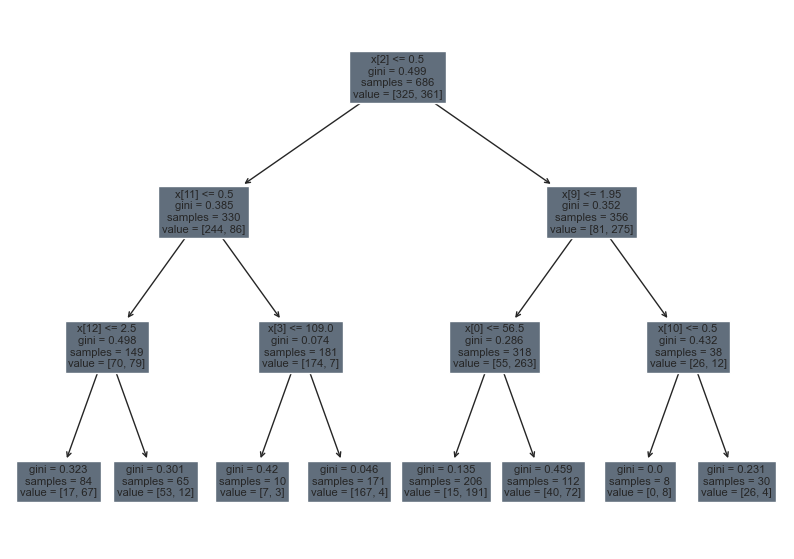

In [29]:
#visualizing the decision tree
plt.figure(figsize = (10,7)) #width and height

tree.plot_tree(cl_gini.fit(X_train, y_train))

In [31]:
# visualization of decision tree

df1 = pd.read_csv('heart_disease.csv')

y = df1['target'].values
x_data = df1.drop(['target'], axis = 1)

#train the decsion tree classifier

model = tree.DecisionTreeClassifier()
model.fit(x_data,y)

#class name from dataset
class_names = df1['target'].unique().astype(str)

#generate graphviz
tree.export_graphviz(model, out_file = 'heart_disease.dot',feature_names = x_data.columns, class_names =class_names, label ='all',filled =True, rounded =True)